# Introduction to Machine Learning
# Take-home Assignment
Marcos Wendell S. O. Santos - ID 2050414 <br>
Sharon Ong and Emmanuel Keuleers, Department of Cognitive Science and Artificial Intelligence – Tilburg University <br>
Academic Year 2019-2020

In [34]:
import time
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# 1. Classification of Motion Capture Hand Postures

Based on the Motion Capture Hand Postures Data Set from the UCI Machine Learning Repository, the proposed task is to create a classification model for 3 of the 5 possible classes of the real-world dataset using Python libraries for building and evaluating models and learning parameters and hyperparameters.

## 1.1. Dataset

The individual dataset (2050414_mocap.csv) comprises of 3 out of the 5 types of hand postures from 12 users. These hand postures were recorded with a Vicon motion capture system using unlabelled markers attached to fingers of a glove in a motion capture environment.

The dataset consists of 37 classes: the x, y and z position of each of the 12 unlabelled markers plus the type of hand posture of that sample.

In [2]:
post = pd.read_csv('2050414_mocap.csv')   

cc = post[['Class']]
y = cc.values

y = y.ravel()

X = post.loc[:,'X0':'Z11']
X = X.values

## 1.2. Exploratory Data Analysis Tasks

Now, we can check the number of samples in each class 

In [3]:
from collections import Counter, OrderedDict

print("Total samples: {:d}".format(len(y)))
print("The classes that will be evaluated in this assignment: {:}".format(list(np.unique(y))))
samples = OrderedDict(Counter(y)).items()
print("\nNumber of samples: {:}".format(list(samples)))

Total samples: 4687
The classes that will be evaluated in this assignment: [3, 4, 5]

Number of samples: [(3, 1635), (4, 1478), (5, 1574)]


Then, we can plot one sample of each class, showing the relation between the coordinates to see how they relate to each other in pairs (X and Y; X and Z; Y and Z) and all together(X, Y and Z). Let's use a subplot representation to display them:

In [4]:
# First, find index of each class sample:

class3 = list(np.where(y == 3)[0])
class4 = list(np.where(y == 4)[0])
class5 = list(np.where(y == 5)[0])

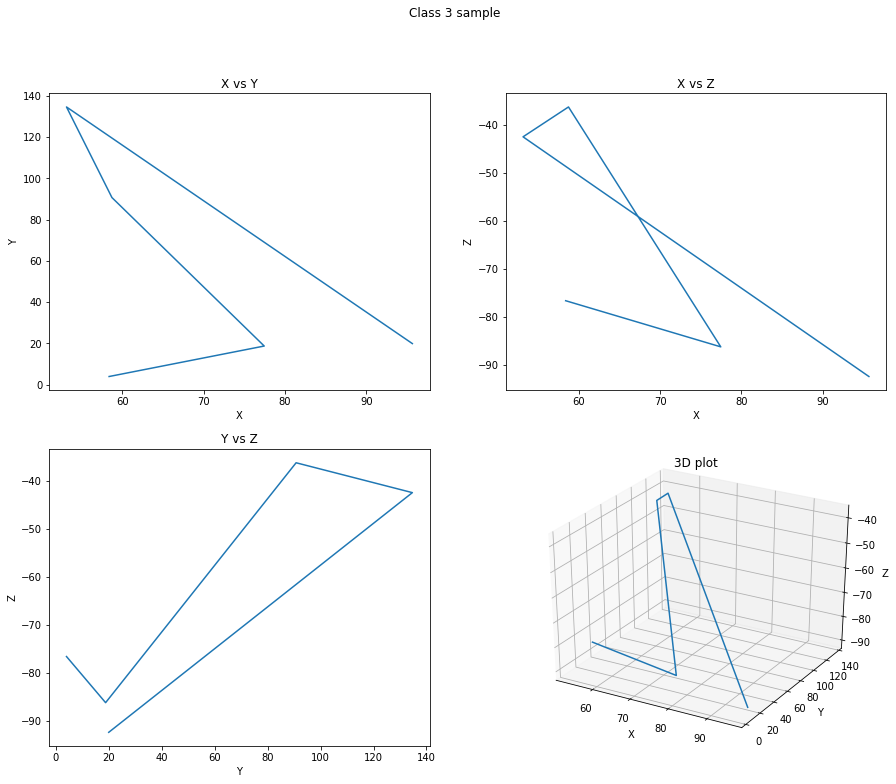

In [5]:
# CLASS 3
fig = plt.figure(figsize=(15,12))
fig.suptitle('Class 3 sample')

ax11 = fig.add_subplot(221)
ax11.plot(X[class3[6], :11], X[class3[6], 12:23])
ax11.set_title('X vs Y')
ax11.set(xlabel='X', ylabel='Y')

ax12 = fig.add_subplot(222)
ax12.plot(X[class3[6], :11], X[class3[6], 24:-1])
ax12.set_title('X vs Z')
ax12.set(xlabel='X', ylabel='Z')

ax21 = fig.add_subplot(223)
ax21.plot(X[class3[6], 12:23], X[class3[6], 24:-1])
ax21.set_title('Y vs Z')
ax21.set(xlabel='Y', ylabel='Z')

ax22 = fig.add_subplot(224, projection='3d')
ax22.plot3D(X[class3[6], :11], X[class3[6], 12:23], X[class3[6], 24:-1])
ax22.set_title('3D plot')
ax22.set(xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

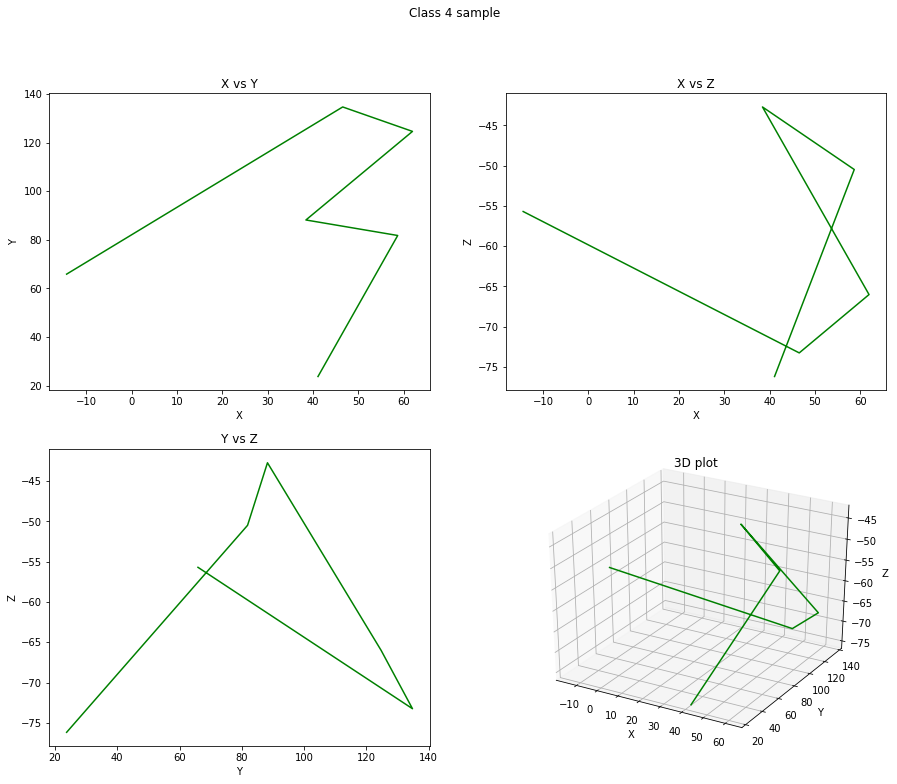

In [6]:
# CLASS 4
fig = plt.figure(figsize=(15,12))
fig.suptitle('Class 4 sample')

ax11 = fig.add_subplot(221)
ax11.plot(X[class4[0]][:11], X[class4[0]][12:23], 'g')
ax11.set_title('X vs Y')
ax11.set(xlabel='X', ylabel='Y')

ax12 = fig.add_subplot(222)
ax12.plot(X[class4[0]][:11], X[class4[0]][24:-1], 'g')
ax12.set_title('X vs Z')
ax12.set(xlabel='X', ylabel='Z')

ax21 = fig.add_subplot(223)
ax21.plot(X[class4[0]][12:23], X[class4[0]][24:-1], 'g')
ax21.set_title('Y vs Z')
ax21.set(xlabel='Y', ylabel='Z')

ax22 = fig.add_subplot(224, projection='3d')
ax22.plot3D(X[class4[0]][:11], X[class4[0]][12:23], X[class4[0]][24:-1], 'g')
ax22.set_title('3D plot')
ax22.set(xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

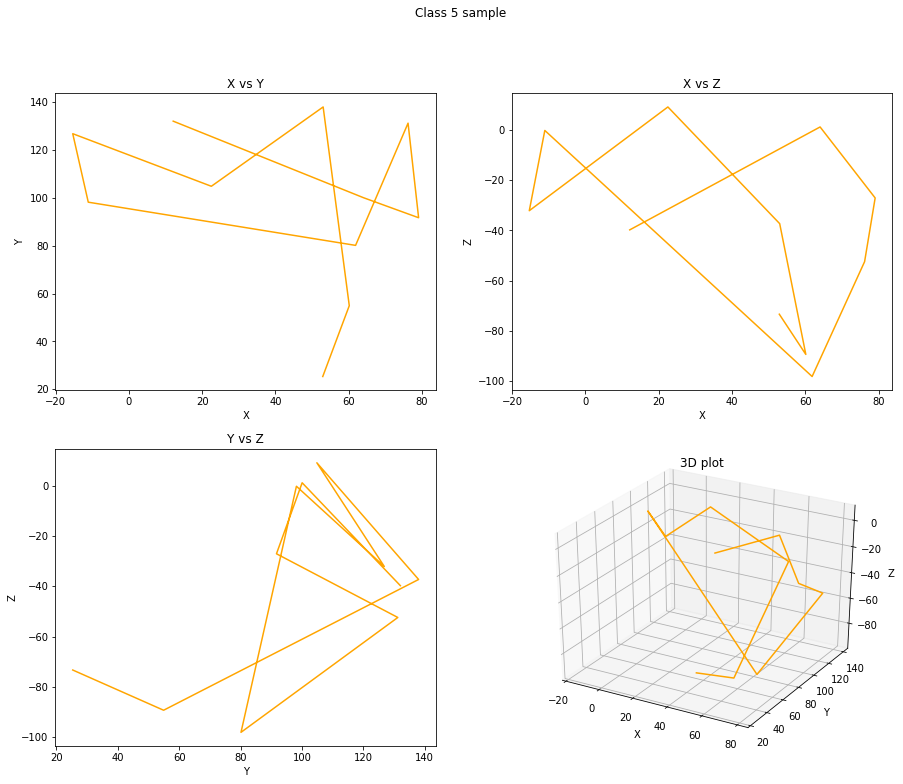

In [7]:
# CLASS 5
fig = plt.figure(figsize=(15,12))
fig.suptitle('Class 5 sample')

ax11 = fig.add_subplot(221)
ax11.plot(X[class5[1], :11], X[class5[1], 12:23], 'orange')
ax11.set_title('X vs Y')
ax11.set(xlabel='X', ylabel='Y')

ax12 = fig.add_subplot(222)
ax12.plot(X[class5[1], :11], X[class5[1], 24:-1], 'orange')
ax12.set_title('X vs Z')
ax12.set(xlabel='X', ylabel='Z')

ax21 = fig.add_subplot(223)
ax21.plot(X[class5[1], 12:23], X[class5[1], 24:-1], 'orange')
ax21.set_title('Y vs Z')
ax21.set(xlabel='Y', ylabel='Z')

ax22 = fig.add_subplot(224, projection='3d')
ax22.plot3D(X[class5[1], :11], X[class5[1], 12:23], X[class5[1], 24:-1], 'orange')
ax22.set_title('3D plot')
ax22.set(xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

## 1.3. Classification Tasks

Let's split the dataset into a train and test set to start applying our classification methods 

In [8]:
import mglearn

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

C:\Users\Marcos Wendell\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Marcos Wendell\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


First, we are going to use a logistic regression with cross-validation with default parameters as our baseline

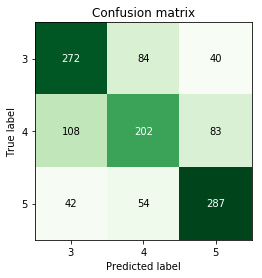


Metrics
Accuracy: 0.600
Precision: 0.650
Recall: 0.646
F1 Score: 0.648


In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='sag', max_iter=100000)
cv = cross_val_score(logreg, X, y, cv=10)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

conf = confusion_matrix(y_test, y_pred)

scores_image = mglearn.tools.heatmap(
conf, xlabel='Predicted label',
ylabel='True label', xticklabels=[3, 4, 5],
yticklabels=[3, 4, 5], cmap=plt.cm.Greens, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()

precision = recall = 0
for idx in range(0, 3):
    precision += conf[idx, idx]/np.sum(conf[idx,:])/3
    recall += conf[idx, idx]/np.sum(conf[:,idx])/3
f1 = 2*(precision*recall)/(precision+recall)    
    
print("\nMetrics")
print("Accuracy: {:.3f}".format(np.mean(cv)))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

The next step is to find the best hyperparameters for the LR classifier

In [10]:
hyperparam = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
grid = GridSearchCV(LogisticRegression(random_state=13, max_iter=1000000), param_grid=hyperparam, cv=10)
grid.fit(X_train, y_train)
print("Logistic Regression Best Parameters: {:}".format(grid.best_params_))
print("Logistic Regression Performance: {:.3f}".format(grid.best_score_))

Logistic Regression Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Logistic Regression Performance: 0.734


With these results in mind, let's compare the baseline model with other approaches and methods applied to the dataset. Our goal is to achieve a better performance than the baseline model.

In [21]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

params = [
    {'C': [0.0001, 0.01, 1, 10, 100], 'gamma': [0.0001, 0.01, 1, 10, 100]},
    {'pca__n_components': [5, 10, 15, 25]},
    {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance']},
    {'max_depth': [3, 5, 7, 10, 15], 'criterion': ['gini', 'entropy']},
    {},
    {}
]

classifiers = [
    ['SVC', SVC(max_iter=100000, random_state=11)],
    ['Gaussian Naive Bayes', make_pipeline(PCA(), GaussianNB())],
    ['KNN', KNeighborsClassifier()],
    ['Decision Tree', DecisionTreeClassifier(random_state=23)],
    ['Random Forest', RandomForestClassifier(random_state=2)],
    ['Gradient Boosting', GradientBoostingClassifier(random_state=35)]
]

X_sc = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=37)

# First, let's work with low-level classifiers with some bagging and boosting classifiers
csfs = []
for csf, param in zip(classifiers, params):
    start = time.time()
    grid = GridSearchCV(csf[1], param_grid=param, cv=10, scoring='accuracy').fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    csfs.append([csf[0], grid.best_estimator_])
    print("{:}:".format(csf[0]))
    print("Runtime: {:.4f}".format(time.time() - start))
    print("Best Parameters: {:}".format(grid.best_params_))
    print("Accuracy: {:.3f}".format(grid.best_score_))
    print("Other Metrics:\n{:}\n".format(classification_report(y_test, y_pred)))

SVC:
Runtime: 323.8938
Best Parameters: {'C': 100, 'gamma': 0.01}
Accuracy: 0.961
Other Metrics:
              precision    recall  f1-score   support

           3       0.97      0.98      0.97       428
           4       0.96      0.95      0.95       344
           5       0.98      0.96      0.97       400

    accuracy                           0.97      1172
   macro avg       0.97      0.97      0.97      1172
weighted avg       0.97      0.97      0.97      1172


Gaussian Naive Bayes:
Runtime: 0.9148
Best Parameters: {'pca__n_components': 25}
Accuracy: 0.765
Other Metrics:
              precision    recall  f1-score   support

           3       0.80      0.78      0.79       428
           4       0.63      0.63      0.63       344
           5       0.84      0.88      0.86       400

    accuracy                           0.77      1172
   macro avg       0.76      0.76      0.76      1172
weighted avg       0.77      0.77      0.77      1172


KNN:
Runtime: 11.1437
Best 

In [22]:
# Now, we can combine classifiers to build more complex models, using ensemble methods
from random import shuffle
from sklearn.ensemble import StackingClassifier, VotingClassifier

# Due to the PCA method applied on Gaussian NB, it need to be removed
# from the list (different number of features being considered)
csfs.remove(csfs[1])

for i in range(0, 3):
    shuffle(csfs)
    voting = VotingClassifier(estimators=csfs[:3]).fit(X_train, y_train)
    stacking = StackingClassifier(estimators=csfs[:3], final_estimator=csfs[-1][1]).fit(X_train, y_train)
    print("Attempt {:}".format(i+1))
    print("Models: {:}".format([i[0] for i in csfs[:3]]))
    print("Stacking Final Estimator: {:}".format(csfs[-1][0]))
    print("Voting Score: {:.3f}".format(voting.score(X_test, y_test)))
    print("Stacking Score: {:.3f}\n".format(stacking.score(X_test, y_test)))

[['SVC', SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=100000, probability=False, random_state=11, shrinking=True,
    tol=0.001, verbose=False)], ['KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')], ['Decision Tree', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')], ['Random Forest', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
        

# 2. Regression to Predict Acute Aquatic Toxicity

Using the QSAR fish toxicity Data Set from the UCI Machine Learning Repository, we will create a program to perform regression and missing data imputation.

## 2.1.  Dataset

The data is provided in the file qsar_fish_toxicity.csv<br>
The features contains values for 6 attributes (molecular descriptors) of 908 chemicals used to predict quantitative acute aquatic toxicity towards the fish Pimephales promelas. There are 6 features are CIC0, SM1 Dz(Z), GATS1i, NdsCH, NdssC, MLOGP. The quantitative response is L50, which is our target variable.

In [23]:
qsar = pd.read_csv('qsar_fish_toxicity.csv') 

data = qsar.values
X = data[:,0:6]
y = data[:,-1]
print("Number of samples: {:d}".format(len(X)))

Number of samples: 908


## 2.2. Exploratory Data Analysis Tasks

Let's check the distribution of the target variable using a histogram plot.

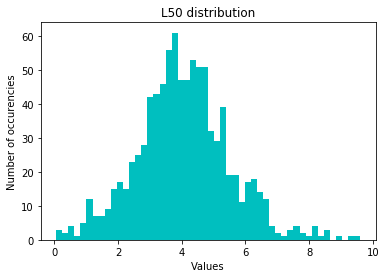

In [24]:
plt.hist(y, bins=50, color='c')
plt.title("L50 distribution")
plt.ylabel("Number of occurencies")
plt.xlabel("Values")
plt.show()

Based on the target's plot, we can determine if it is normally distributed. As we can see, <strong>the target value follows a Gaussian distribution</strong>, so we don't need to perform a univariate transformation (e.g. a sin or log transformation) to run our regression models.

Using subplots, we are able to present scatterplots displaying the relationship between each feature variable with the
target variable, to see how each of these 6 features vary with the target variable.

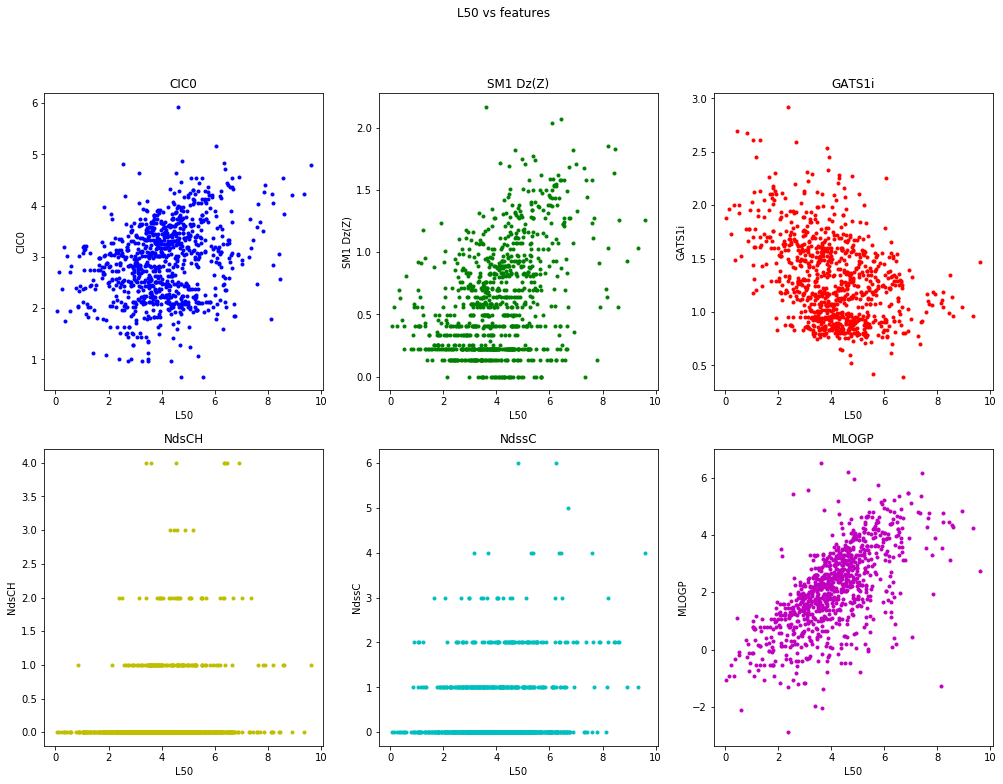

In [25]:
# Plot y versus each feature
fig = plt.figure(figsize=(17,12))
fig.suptitle('L50 vs features')

ax11 = fig.add_subplot(231)
ax11.plot(y, X[:,0], 'b.')
ax11.set_title('CIC0')
ax11.set(xlabel='L50', ylabel='CIC0')

ax12 = fig.add_subplot(232)
ax12.plot(y, X[:,1], 'g.')
ax12.set_title('SM1 Dz(Z)')
ax12.set(xlabel='L50', ylabel='SM1 Dz(Z)')

ax13 = fig.add_subplot(233)
ax13.plot(y, X[:,2], 'r.')
ax13.set_title('GATS1i')
ax13.set(xlabel='L50', ylabel='GATS1i')

ax21 = fig.add_subplot(234)
ax21.plot(y, X[:,3], 'y.')
ax21.set_title('NdsCH')
ax21.set(xlabel='L50', ylabel='NdsCH')

ax22 = fig.add_subplot(235)
ax22.plot(y, X[:,4], 'c.')
ax22.set_title('NdssC')
ax22.set(xlabel='L50', ylabel='NdssC')

ax23 = fig.add_subplot(236)
ax23.plot(y, X[:,5], 'm.')
ax23.set_title('MLOGP')
ax23.set(xlabel='L50', ylabel='MLOGP')

plt.show()

Finally, let's compute the correlation matrix to measures the relationship between all the features and display it in a heatmap.

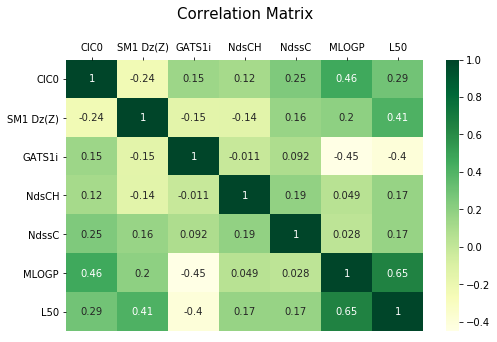

In [27]:
X_y = np.concatenate((X, y.reshape(908,1)), axis=1)
corrMatrix = pd.DataFrame(X_y,columns=['CIC0', 'SM1 Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'L50']).corr()
plt.figure(figsize=(8,5))
ax = sn.heatmap(corrMatrix, annot=True, cmap='YlGn')
ax.xaxis.set_ticks_position('top')
plt.title("Correlation Matrix\n\n", fontsize=15)
plt.show()

## 2.3. Regression Tasks

Let's split the dataset into a train and test set to start applying our regression methods.

In [28]:
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

First, we are going to fit a linear regression to the data, then we can evaluate the method by computing the R2
score.

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("R2 Score: {:.3f}".format(r2_score(y_test, y_pred)))

R2 Score: 0.511


We can now compare the linear regression analysis with a ridge regression and lasso regression.

In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

param = { 'alpha': [0.0001, 0.01, 1, 10, 100] }

ridge_grid = GridSearchCV(Ridge(max_iter=100000), param_grid=param, cv=10, scoring='r2').fit(X, y)
lasso_grid = GridSearchCV(Lasso(max_iter=100000), param_grid=param, cv=10, scoring='r2').fit(X, y)

print("Ridge Regression:")
print("Best Parameters: {:}".format(ridge_grid.best_params_))
print("Performance: {:.3f}".format(ridge_grid.best_score_))

print("\nLasso Regression:")
print("Best Parameters: {:}".format(lasso_grid.best_params_))
print("Performance: {:.3f}".format(lasso_grid.best_score_))

Ridge Regression:
Best Parameters: {'alpha': 1}
Performance: 0.528

Lasso Regression:
Best Parameters: {'alpha': 0.0001}
Performance: 0.528


Using Grid Search and Cross Validation, it's possible to compare the performance of regression analysis with SVM regression, and Decision Tree regression using the R2 score as a metric.

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

estimators = [
    [ 'SVR', SVR(max_iter=100000) ],
    [ 'Decision Tree', Pipeline([('pca', PCA()), ('regressor', DecisionTreeRegressor(random_state=12))]) ]
]

params = [
    { 'C': [0.0001, 0.01, 1, 10, 100], 'epsilon': [0.001, 0.1, 1], 'gamma': [0.0001, 0.01, 1, 10, 100]},
    { 'pca__n_components':[1, 2, 3], 'regressor__max_depth': [1, 3, 5, 7], 'regressor__criterion': ['mse', 'mae']}
]

for estimator, param in zip(estimators, params):
    grid = GridSearchCV(estimator[1], param_grid=param, cv=10, scoring = 'r2').fit(X_train_sc, y_train)
    print("{:}:".format(estimator[0]))
    print("Best Parameters: {:}".format(grid.best_params_))
    print("R2 Score: {:.3f}\n".format(grid.score(X_test_sc, y_test)))

SVR:
Best Parameters: {'C': 10, 'epsilon': 0.001, 'gamma': 0.01}
R2 Score: 0.572

Decision Tree:
Best Parameters: {'pca__n_components': 2, 'regressor__criterion': 'mae', 'regressor__max_depth': 3}
R2 Score: 0.430



## 2.4. Missing Data Imputation Task

In addition to the dataset file, we received another file (2050414_qsar.csv) where some variables have been randomly replaced with NaN, hence, there is missing data.

In [44]:
qsar_full = pd.read_csv('qsar_fish_toxicity.csv') 
qsar_miss = pd.read_csv('2050414_qsar.csv')

data_full = qsar_full.values
data_miss = qsar_miss.values[:,1:] # first column removed - only indexes

Our task is to compare three different missing data imputation methods and evaluate them against the ground truth (the data samples from the original file).

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

regressor = RandomForestRegressor(random_state=9)

imputers = [
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    KNNImputer(missing_values=np.nan),
    IterativeImputer(estimator=regressor, random_state=0),
]

mses = []
for imp in imputers:
    data_imp = imp.fit_transform(data_miss)
    data_imp = StandardScaler().fit_transform(data_imp)
    X_miss = data_imp[:,:6] 
    y_miss = data_imp[:,-1]
    cv_scores = cross_val_score(regressor, X_miss, y_miss, scoring='neg_mean_squared_error', cv=5)
    mses.append(-np.mean(cv_scores.mean()))

data_full = StandardScaler().fit_transform(data_full)
X_full = data_full[:,:6]
y_full = data_full[:,-1]
cv_scores = cross_val_score(regressor, X_full, y_full, scoring='neg_mean_squared_error', cv=5)
mses.append(-np.mean(cv_scores.mean()))

C:\Users\Marcos Wendell\AppData\Roaming\Python\Python36\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


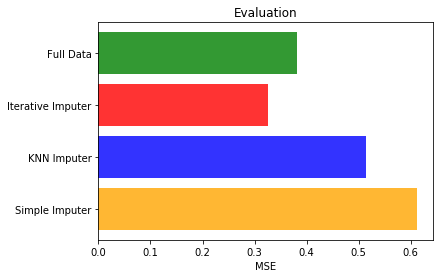

In [46]:
methods = ['Simple Imputer', 'KNN Imputer', 'Iterative Imputer', 'Full Data']
colors = ['orange', 'b', 'r', 'g']
for i in range(0,4):
    plt.barh(i, mses[i], color=colors[i], alpha=0.8, align='center')

plt.title('Evaluation')
plt.xlabel('MSE')
plt.yticks(np.arange(4), methods)
plt.show()